In [5]:
import numpy as np
import matplotlib.pyplot as plt

import adaptivealgo.cli.policy_iter as pi
from adaptivealgo.lib.simulator import Simulator
import adaptivealgo.cli.simulate_policy as sim

In [6]:
n_links = 4
f_thresh = 0.4
actions = [0.1, 0.2, 0.3, 0.4, 0.5]
alpha = 1.0
gamma = 0.2
tol = 1e-6

n_episodes = 10_000

In [7]:
policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
print(f"Policy iteration took {i} iterations")

simulator = Simulator(policy["policy"], n_links, f_thresh, actions, alpha, gamma)
opt_samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime: {int(np.mean(opt_samples))} steps")

Policy iteration took 2 iterations
Mean runtime: 25 steps


In [8]:
sp_samples = {}

for action_idx, action in enumerate(actions):
    subopt_policy = {s: 0 for s in policy["policy"].keys()}

    try:
        simulator = Simulator(subopt_policy, n_links, f_thresh, [action], alpha, gamma)
    except AssertionError:
        sp_samples[action_idx] = []
        print(f"Mean runtime for action {action}: +inf steps")
        continue

    sp_samples[action_idx] = sim.gen_policy_samples(simulator, n_episodes)
    print(f"Mean runtime for action {action}: {int(np.mean(sp_samples[action_idx]))} steps")

Mean runtime for action 0.1: 824 steps
Mean runtime for action 0.2: 133 steps
Mean runtime for action 0.3: 66 steps
Mean runtime for action 0.4: 63 steps
Mean runtime for action 0.5: +inf steps


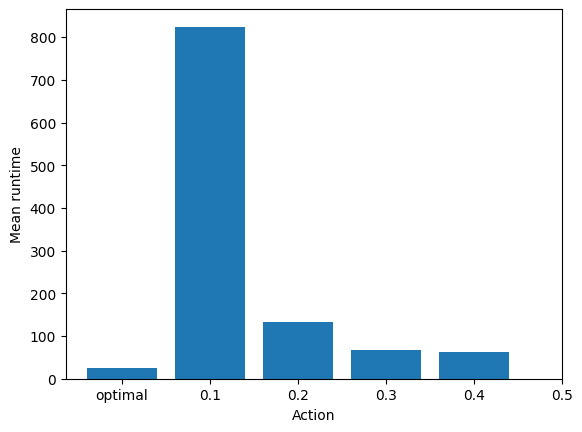

In [9]:
mean_runtimes = [np.mean(opt_samples)] + [np.mean(sp_samples[i]) for i in range(len(actions)) if sp_samples[i]]

fig, ax = plt.subplots()
ax.bar(range(len(actions)), mean_runtimes)
ax.set_xticks(range(len(actions) + 1))
ax.set_xticklabels(["optimal"] + actions)
ax.set_ylabel("Mean runtime")
ax.set_xlabel("Action")
plt.show()